In [1]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


Running on: CUDA


Saving FloodedCarHiRes.jpg to FloodedCarHiRes (1).jpg

image 1/1 /content/FloodedCarHiRes (1).jpg: 448x640 1 car-72Y9, 1 flood, 3 persons, 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3


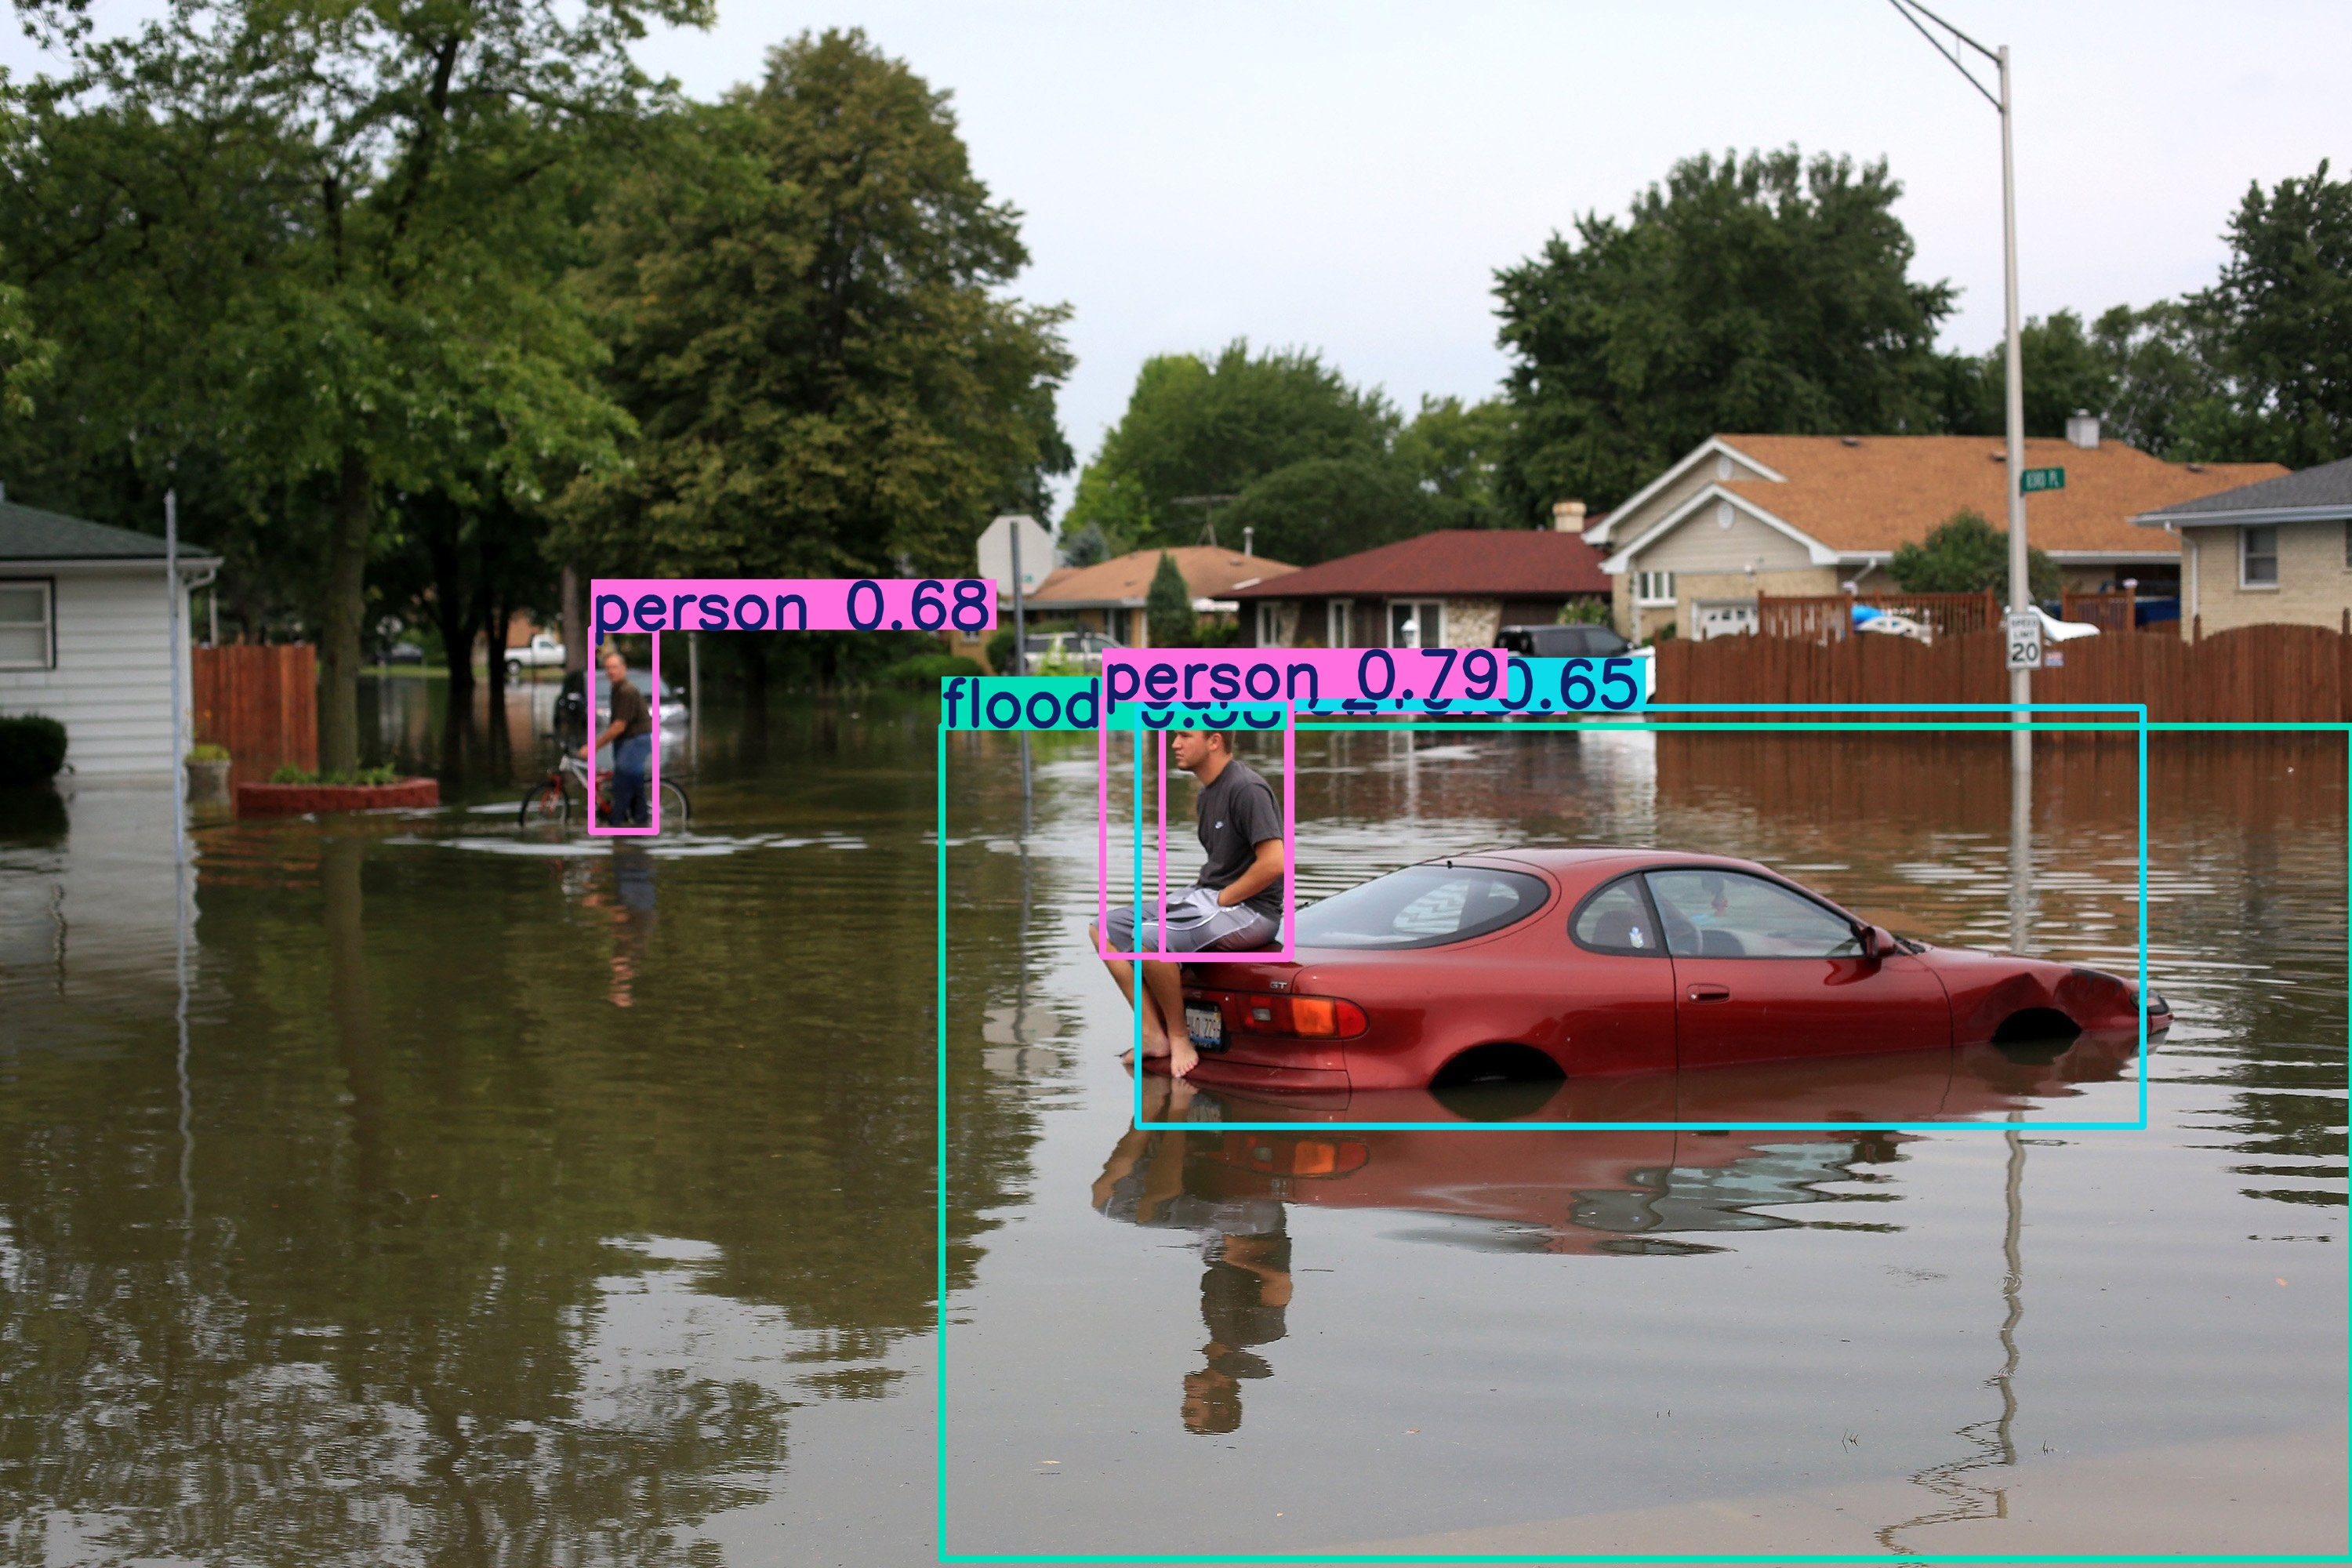

In [4]:
import torch, os
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, HTML, display
from base64 import b64encode

# ================== CONFIG ==================
MODEL_PATH = "/content/cctv.pt"  # <-- your trained model
CONFIDENCE = 0.5                 # detection threshold
# ============================================

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device.upper()}")

model = YOLO(MODEL_PATH).to(device)

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

results = model(file_name, save=True, conf=CONFIDENCE)
output_dir = results[0].save_dir
output_file = os.path.join(output_dir, file_name)

if file_name.lower().endswith(('.jpg','.jpeg','.png')):
    display(Image(filename=output_file))
else:
    with open(output_file,'rb') as f:
        data_url = "data:video/mp4;base64," + b64encode(f.read()).decode()
    display(HTML(f'<video width=640 controls><source src="{data_url}" type="video/mp4"></video>'))
